Cell 1: Import Libraries

We'll need pandas to handle our data, PCA for dimensionality reduction, KMeans for clustering, and matplotlib.pyplot to create the "Elbow Method" plot.



In [1]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import warnings

# Suppress a known warning from KMeans for a cleaner output
warnings.filterwarnings('ignore', category=FutureWarning, module='sklearn.cluster._kmeans')

Cell 2: Load Processed Data
Load the cleaned and scaled data that you prepared in the previous notebook.

In [2]:
# Load the processed, scaled data
df = pd.read_csv('processed_team_data.csv')

# Separate team names for later, and get the numerical data for modeling
teams = df['Squad']
X = df.drop('Squad', axis=1)

print("Processed data loaded successfully.")

Processed data loaded successfully.


Cell 3: Principal Component Analysis (PCA)

Here, we'll reduce the multiple statistical features (GF, GA, xG, etc.) into just two principal components (PC1, PC2). These components capture the most significant variance in the data, essentially creating two primary axes of "playstyle".

In [3]:
# Initialize PCA to reduce our data to 2 components for 2D visualization
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X)

# Create a DataFrame with the PCA results
df_pca = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
df_pca.insert(0, 'Squad', teams)

# Check how much variance is explained by our two components
print(f"Explained variance by PC1: {pca.explained_variance_ratio_[0]:.2%}")
print(f"Explained variance by PC2: {pca.explained_variance_ratio_[1]:.2%}")
print(f"Total variance explained by 2 components: {pca.explained_variance_ratio_.sum():.2%}")

print("\nData after PCA transformation:")
display(df_pca.head())

Explained variance by PC1: 66.61%
Explained variance by PC2: 13.47%
Total variance explained by 2 components: 80.08%

Data after PCA transformation:


,Squad,PC1,PC2
0,NaN,3.083566,-0.559779
1,Arsenal,1.222042,-0.918252
2,Tottenham,1.849854,0.144266
3,Liverpool,1.346236,0.341121
4,Bournemouth,2.869760,0.761404


Cell 4: Find Optimal Clusters with the Elbow Method

How many tactical groups should we have? 3? 4? 5? The Elbow Method helps us decide. We run K-Means for a range of cluster counts and plot the "inertia". The "elbow" of the curve is typically the best number of clusters (k).



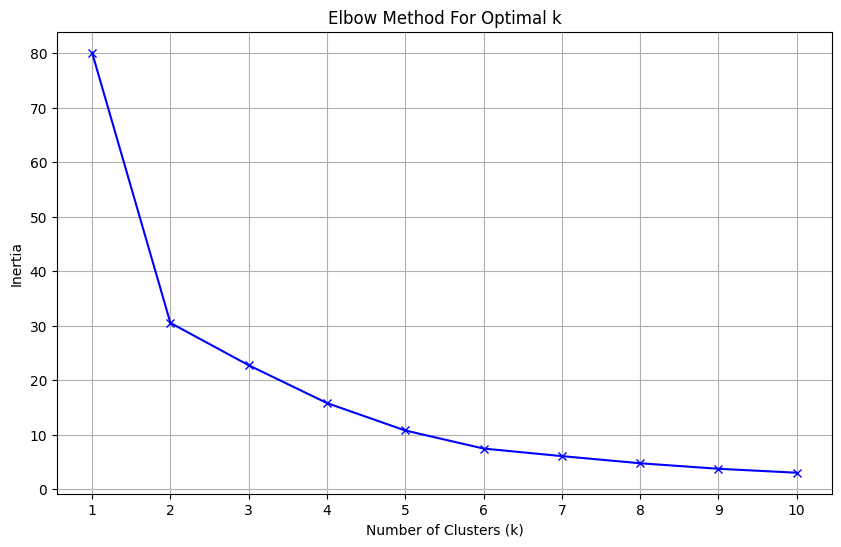

In [4]:
# Use the Elbow Method to find the optimal number of clusters (k)
inertia = []
K = range(1, 11) # Test for 1 to 10 clusters

for k in K:
    kmeans_model = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans_model.fit(df_pca[['PC1', 'PC2']])
    inertia.append(kmeans_model.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(10, 6))
plt.plot(K, inertia, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.xticks(K)
plt.grid(True)
plt.show()

Cell 5: Apply K-Means Clustering

Based on the elbow plot from the cell above, choose the optimal k. Often, this is 3, 4, or 5 for this type of analysis. For this example, let's assume k=4 is the elbow point. We then run K-Means with this k to assign each team to a cluster.

In [5]:
# Let's assume the elbow is at k=4. Change this value if your plot suggests a different number.
OPTIMAL_K = 4

# Run K-Means with the optimal number of clusters
kmeans = KMeans(n_clusters=OPTIMAL_K, random_state=42, n_init=10)
df_pca['Cluster'] = kmeans.fit_predict(df_pca[['PC1', 'PC2']])

print(f"Clustering complete with {OPTIMAL_K} clusters.")
display(df_pca.head())

Clustering complete with 4 clusters.


,Squad,PC1,PC2,Cluster
0,NaN,3.083566,-0.559779,3
1,Arsenal,1.222042,-0.918252,0
2,Tottenham,1.849854,0.144266,3
3,Liverpool,1.346236,0.341121,2
4,Bournemouth,2.869760,0.761404,3


Cell 6: Save Final Clustered Data

Save the final DataFrame, which now includes the team names, their positions on our two "playstyle" axes (PC1, PC2), and their assigned tactical cluster. This is the file we'll use for our final visualization.

In [6]:
# Define the output path for the clustered data
OUTPUT_CSV_PATH = 'clustered_team_data.csv'

# Save the final clustered data
df_pca.to_csv(OUTPUT_CSV_PATH, index=False)

print(f"✅ Final clustered data saved successfully to '{OUTPUT_CSV_PATH}'")

✅ Final clustered data saved successfully to 'clustered_team_data.csv'
